In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

# Current-Voltage Characteristics

In [2]:
simulations=["L10nm_Vds0.1_Vgs__3.5_1", "L10nm_Vds0.25_Vgs__3.5_1", "L10nm_Vds0.35_Vgs__3.5_1"]

Vi=0
Vf=0.4
var="Vds"
all_I_Vds_curves={}
to_remove=[]
for sim in simulations:
    stuff_inside = os.listdir(sim)
    print(sim)
    curr_volt_files=[]
    for el in stuff_inside:
        if 'CURRENT1OVERL' in el:
            curr_volt_files.append(el)
    try:
        aux = np.loadtxt(f"{sim}/{curr_volt_files[0]}")
    except:
        print(f"{sim} folder empty!")
        to_remove.append(sim)
        continue
    I_Vds_curves = np.zeros(( len(curr_volt_files),  aux.shape[1], aux.shape[0]))
    for k in range(len(curr_volt_files)):
        I_Vds_curves[k] = np.loadtxt(f"{sim}/{curr_volt_files[k]}").T
    all_I_Vds_curves[sim]=I_Vds_curves

Vs = np.linspace(Vi, Vf, len(all_I_Vds_curves[sim]))
for sim in to_remove:
    simulations.remove(sim)


L10nm_Vds0.1_Vgs__3.5_1
L10nm_Vds0.25_Vgs__3.5_1
L10nm_Vds0.35_Vgs__3.5_1


In [3]:
def autocorr(x, t=1):
    return np.mean((x[:-t]-x.mean())*(x[t:]-x.mean()))/np.std(x)**2
def autocorr_piers(x, t=1):
    return np.corrcoef(np.array([x[:-t], x[t:]]))[0,1]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in true_divide


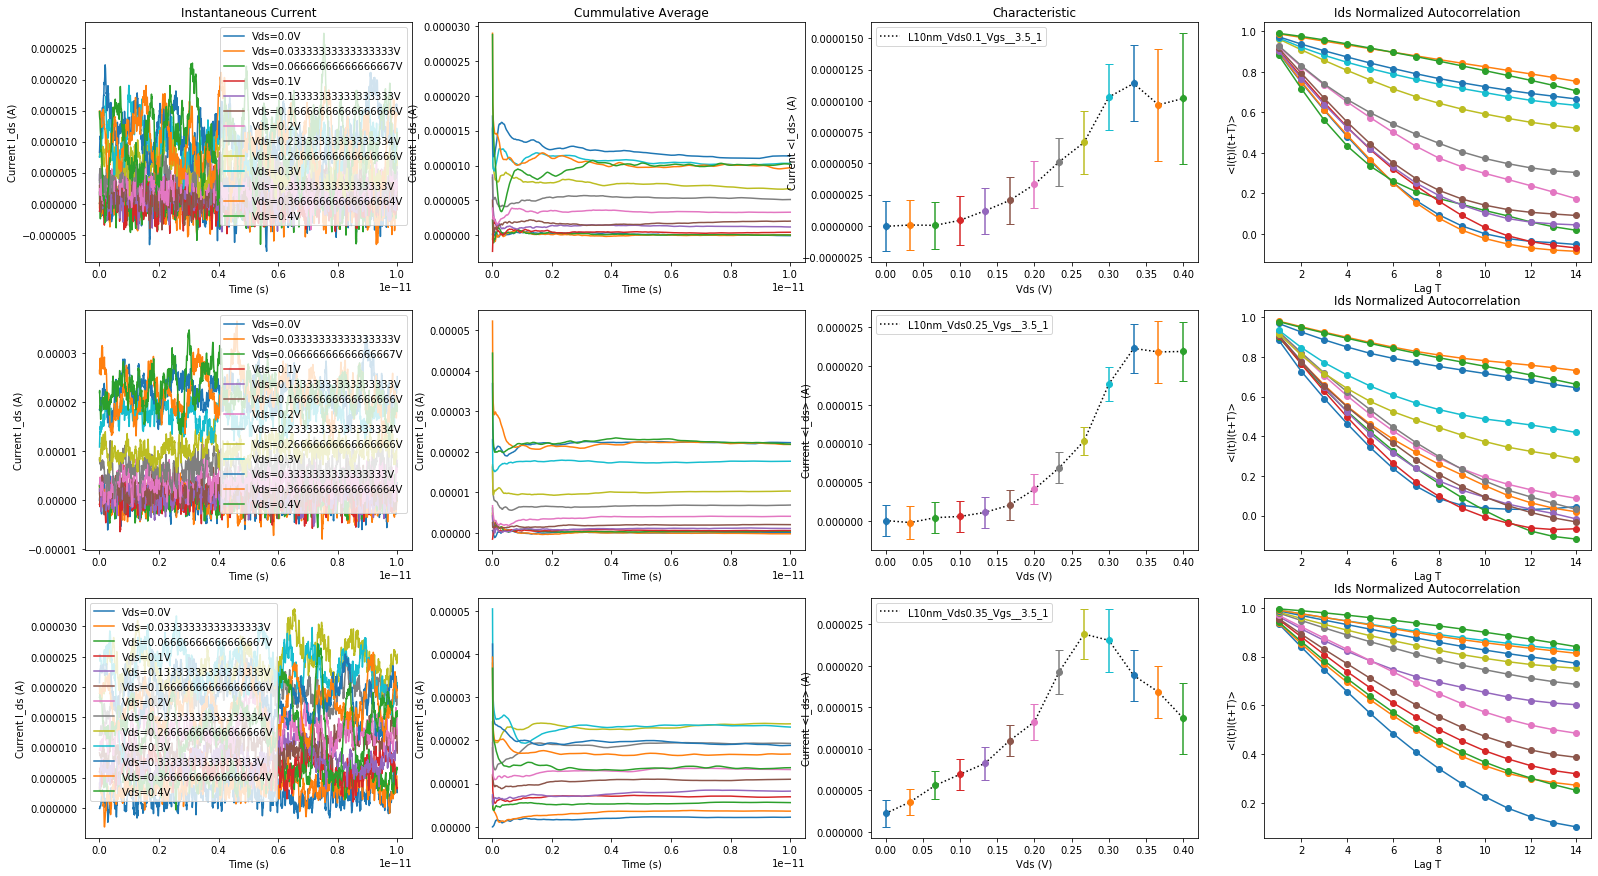

In [4]:
fig, axs =plt.subplots(len(simulations)+1*(len(simulations)==1),4,figsize=(27, 5*(len(simulations)+1*(len(simulations)==1))))
axs[0,0].set_title("Instantaneous Current")
axs[0,1].set_title("Cummulative Average")
axs[0,2].set_title("Characteristic")
all_means = {}
all_stds = {}
all_autocorrelations = {}
lags=np.arange(1, 15)
for n_sim, sim in enumerate(simulations):
    I_Vds_curves=all_I_Vds_curves[sim]
    Vs = np.linspace(Vi, Vf, len(I_Vds_curves))
    means=[]
    all_stds[sim]=[]
    all_autocorrelations[sim]=[]
    for k,I_Vds in enumerate(I_Vds_curves):
        axs[n_sim,0].plot(I_Vds[0], I_Vds[1], label=f"{var}={Vs[k]}V")
        axs[n_sim, 0].set_xlabel("Time (s)")
        axs[n_sim, 0].set_ylabel("Current I_ds (A)")
        axs[n_sim,0].legend()
        axs[n_sim,1].plot(I_Vds[0], np.cumsum(I_Vds[1])/np.arange(len(I_Vds[1])), label=f"{var}={Vs[k]}V")
        axs[n_sim, 1].set_xlabel("Time (s)")
        axs[n_sim, 1].set_ylabel("Current I_ds (A)")
        #axs[n_sim,0].legend()
        means.append(np.mean(I_Vds[1]))
        all_stds[sim].append(np.std(I_Vds[1]))
        all_autocorrelations[sim].append([ autocorr(I_Vds[1], lag) for lag in lags])
        #axs[n_sim, 2].plot([Vs[k]], [means[k]], 'o')
        axs[n_sim, 2].errorbar([Vs[k]], [means[k]], xerr=0, yerr=all_stds[sim][-1],fmt='o',capsize=4)
        axs[n_sim,3].plot(lags, all_autocorrelations[sim][-1], 'o-')
    axs[n_sim,3].set_title("Ids Normalized Autocorrelation")
    axs[n_sim, 3].set_xlabel(f"Lag T")
    axs[n_sim, 3].set_ylabel("<I(t)I(t+T)>")
    axs[n_sim, 2].plot(Vs, means, 'k:', label=sim)
    axs[n_sim, 2].set_xlabel(f"{var} (V)")
    axs[n_sim, 2].set_ylabel("Current <I_ds> (A)")
    axs[n_sim, 2].legend()
    all_means[sim]=np.array(means)
        
#plt.savefig("1.png", dpi=100)
plt.show()

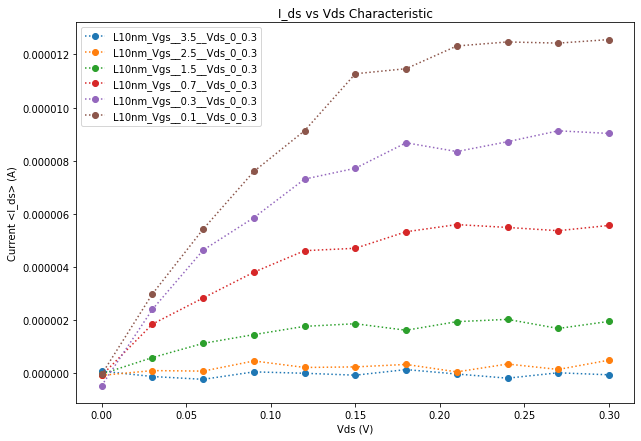

In [6]:
fig, ax = plt.subplots(1,1,figsize=(10,7))
for sim in simulations:
    Vs = np.linspace(Vi, Vf, len(all_means[sim]))
    #ax.errorbar(Vs, all_means[sim], xerr=0, yerr=all_stds[sim],fmt=':o',capsize=4, label=sim)
    ax.plot(Vs, all_means[sim], ':o', label=sim)
ax.set_xlabel(f"{var} (V)")
ax.set_ylabel("Current <I_ds> (A)")
ax.set_title(f"I_ds vs {var} Characteristic")
plt.legend()
plt.savefig("2.png", dpi=100)
plt.show()
    

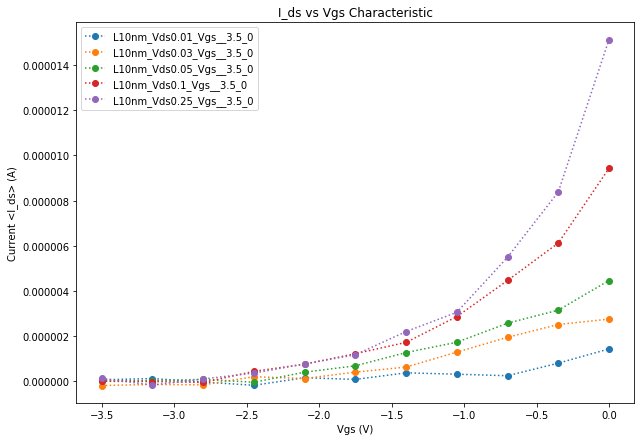

In [6]:
var="Vgs"
Vi=-3.5
Vf=0.0
fig, ax = plt.subplots(1,1,figsize=(10,7))
for sim in simulations:
    Vs = np.linspace(Vi, Vf, len(all_means[sim]))
    #ax.errorbar(Vs, all_means[sim], xerr=0, yerr=all_stds[sim],fmt=':o',capsize=4, label=sim)
    ax.plot(Vs, all_means[sim], ':o', label=sim)
ax.set_xlabel(f"{var} (V)")
ax.set_ylabel("Current <I_ds> (A)")
ax.set_title(f"I_ds vs {var} Characteristic")
plt.legend()
plt.savefig("3.png", dpi=100)
plt.show()
    

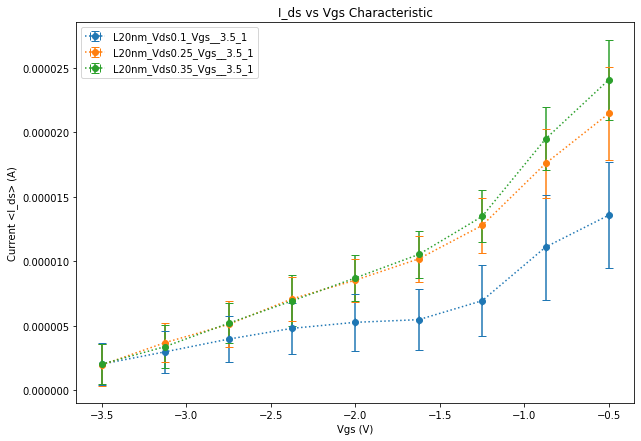

In [31]:
var="Vgs"
Vi=-3.5
Vf=1
fig, ax = plt.subplots(1,1,figsize=(10,7))
z=9
for sim in simulations:
    Vs = np.linspace(Vi, Vf, len(all_means[sim]))
    ax.errorbar(Vs[:z], all_means[sim][:z], xerr=0, yerr=all_stds[sim][:z],fmt=':o',capsize=4, label=sim)
    #ax.plot(Vs, all_means[sim], ':o', label=sim)
ax.set_xlabel(f"{var} (V)")
ax.set_ylabel("Current <I_ds> (A)")
ax.set_title(f"I_ds vs {var} Characteristic")
plt.legend()
plt.savefig("4.png", dpi=100)
plt.show()
    

### Fit Line
After visually finding the region above which the desired regime happens, we can fit a line from that point on.

Slopes : [3.7384396618999897e-07, 3.7320961473666657e-06, -1.0454642034499992e-06, -7.33070534999986e-07, 8.178333733333326e-06, 2.260936333333357e-06]
Thresholds : [0.40898560897594594, 0.18404088435814828, 2.079093874214562, 7.767115204064375, -0.8216225165295704, -5.248899177317187]
Average slope: 2.13e-06 (ohm^-1)
Average Resistence: 1.98e+05 (ohm)
Average threshold: 0.728 (V)


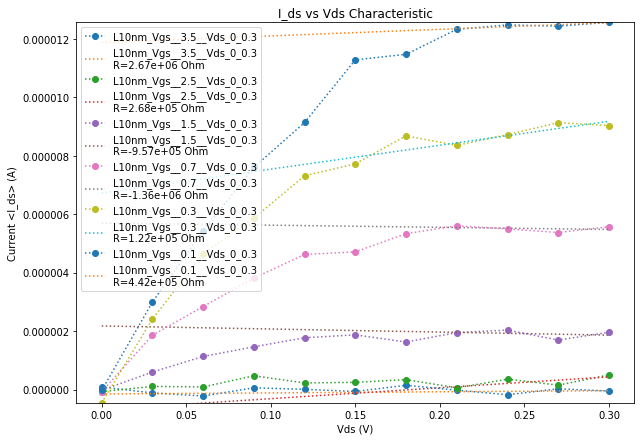

In [11]:
fr=[0.2]*len(simulations) # Vds of the previous plot
slope_or_thresh='slope'
fig, ax = plt.subplots(1,1,figsize=(10,7))
slopes=[]
thresholds=[]
maxi=0
mini=0
for k,sim in enumerate(simulations):
    a, b = np.polyfit( Vs[Vs>=fr[k]], all_means[sim][Vs>=fr[k]], 1) #b+ax
    ax.plot(Vs, all_means[sim], ':o', label=sim)
    #ax.errorbar(Vs, all_means[sim], xerr=0, yerr=all_stds[sim],fmt='-o',capsize=4, label=sim)
    if slope_or_thresh=='slope':
        ax.plot(Vs, Vs*a+b, ':', label=f"{sim}\nR={1/a:.3} Ohm")
    else:
        ax.plot(Vs, Vs*a+b, ':', label=f"{sim}\nThrs={-b/a:.3} V")        
    slopes.append(a)
    thresholds.append(-b/a)
    maxi=max(maxi, np.max(all_means[sim]))
    mini=min(mini, np.min(all_means[sim]))

print(f"Slopes : {slopes}")
print(f"Thresholds : {thresholds}")
print(f"Average slope: {np.mean(slopes):.3} (ohm^-1)")
print(f"Average Resistence: {np.mean(1/np.array(slopes)):.3} (ohm)")
print(f"Average threshold: {np.mean(thresholds):.3} (V)")      

ax.set_xlabel(f"{var} (V)")
ax.set_ylabel("Current <I_ds> (A)")
ax.set_title(f"I_ds vs {var} Characteristic")
ax.set_ylim((mini, maxi))
plt.legend()
plt.savefig("22.png", dpi=100)

plt.show()

Slopes : [2.991919107142859e-06, 2.121052837103174e-06, 1.797986061765879e-06, 7.026671345125016e-07]
Thresholds : [-3.3658511936945374, -3.4478964772715037, -2.50016470211611, -3.7461882919300193]
Average slope: 1.9e-06 (ohm^-1)
Average Resistence: 6.96e+05 (ohm)
Average threshold: -3.27 (V)


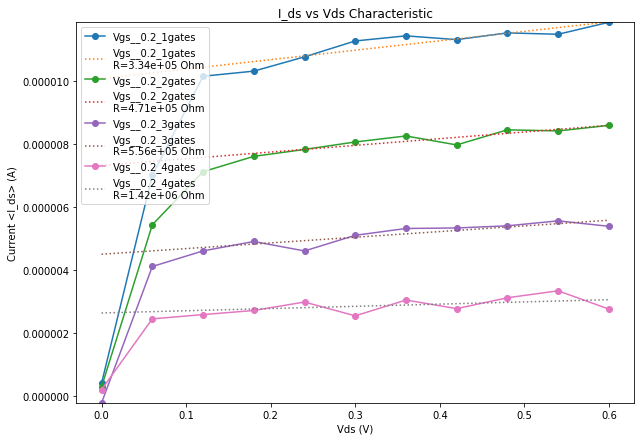

In [7]:
var="Vds"
Vi=0
Vf=0.6
Vs = np.linspace(Vi, Vf, len(all_means[sim]))
fr=[0.15]*len(simulations) # Vds of the previous plot
slope_or_thresh='slope'
fig, ax = plt.subplots(1,1,figsize=(10,7))
slopes=[]
thresholds=[]
maxi=0
mini=0
for k,sim in enumerate(simulations):
    a, b = np.polyfit( Vs[Vs>=fr[k]], all_means[sim][Vs>=fr[k]], 1) #b+ax
    ax.plot(Vs, all_means[sim], '-o', label=sim)
    #ax.errorbar(Vs, all_means[sim], xerr=0, yerr=all_stds[sim],fmt='-o',capsize=4, label=sim)
    if slope_or_thresh=='slope':
        ax.plot(Vs, Vs*a+b, ':', label=f"{sim}\nR={1/a:.3} Ohm")
    else:
        ax.plot(Vs, Vs*a+b, ':', label=f"{sim}\nThrs={-b/a:.3} V")        
    slopes.append(a)
    thresholds.append(-b/a)
    maxi=max(maxi, np.max(all_means[sim]))
    mini=min(mini, np.min(all_means[sim]))

print(f"Slopes : {slopes}")
print(f"Thresholds : {thresholds}")
print(f"Average slope: {np.mean(slopes):.3} (ohm^-1)")
print(f"Average Resistence: {np.mean(1/np.array(slopes)):.3} (ohm)")
print(f"Average threshold: {np.mean(thresholds):.3} (V)")      

ax.set_xlabel(f"{var} (V)")
ax.set_ylabel("Current <I_ds> (A)")
ax.set_title(f"I_ds vs {var} Characteristic")
ax.set_ylim((mini, maxi))
plt.legend()
plt.savefig("5.png", dpi=100)
plt.show()

Slopes : [7.098322970714285e-06, 1.3774118232142867e-05]
Thresholds : [-1.2897810897525366, -1.0519596148524173]
Average slope: 1.04e-05 (ohm^-1)
Average Resistence: 1.07e+05 (ohm)
Average threshold: -1.17 (V)
std slope: 3.34e-06 (ohm^-1)
std Resistence: 3.41e+04 (ohm)
std threshold: 0.119 (V)


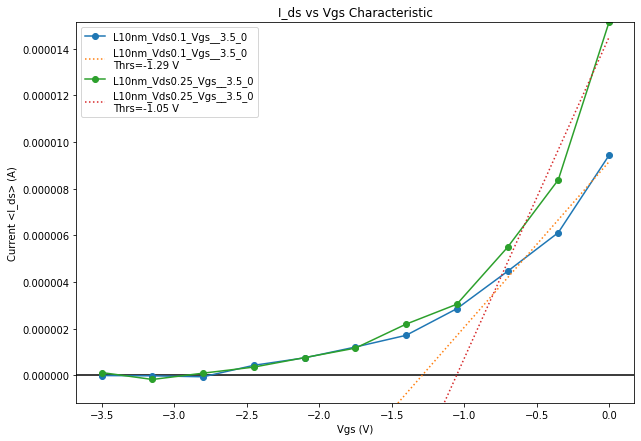

In [10]:
fr=[-1]*len(simulations) # Vds of the previous plot
slope_or_thresh='no'
fig, ax = plt.subplots(1,1,figsize=(10,7))
slopes=[]
thresholds=[]
maxi=0
mini=0
ax.axhline(y=0.0, color='k', linestyle='-')

for k,sim in enumerate(simulations[-2:]):
    a, b = np.polyfit( Vs[Vs>=fr[k]], all_means[sim][Vs>=fr[k]], 1) #b+ax
    ax.plot(Vs, all_means[sim], '-o', label=sim)
    #ax.errorbar(Vs, all_means[sim], xerr=0, yerr=all_stds[sim],fmt='-o',capsize=4, label=sim)
    if slope_or_thresh=='slope':
        ax.plot(Vs, Vs*a+b, ':', label=f"{sim}\nR={1/a:.3} Ohm")
    else:
        ax.plot(Vs, Vs*a+b, ':', label=f"{sim}\nThrs={-b/a:.3} V")        
    slopes.append(a)
    thresholds.append(-b/a)
    maxi=max(maxi, np.max(all_means[sim]))
    mini=min(mini, np.min(all_means[sim]))

print(f"Slopes : {slopes}")
print(f"Thresholds : {thresholds}")
print(f"Average slope: {np.mean(slopes):.3} (ohm^-1)")
print(f"Average Resistence: {np.mean(1/np.array(slopes)):.3} (ohm)")
print(f"Average threshold: {np.mean(thresholds):.3} (V)")  
print(f"std slope: {np.std(slopes):.3} (ohm^-1)")
print(f"std Resistence: {np.std(1/np.array(slopes)):.3} (ohm)")
print(f"std threshold: {np.std(thresholds):.3} (V)") 

ax.set_xlabel(f"{var} (V)")
ax.set_ylabel("Current <I_ds> (A)")
ax.set_title(f"I_ds vs {var} Characteristic")
ax.set_ylim((mini-0.000001, maxi))
plt.legend()
plt.savefig("32.png", dpi=100)

plt.show()


# $I_{off}$ vs Channel Length

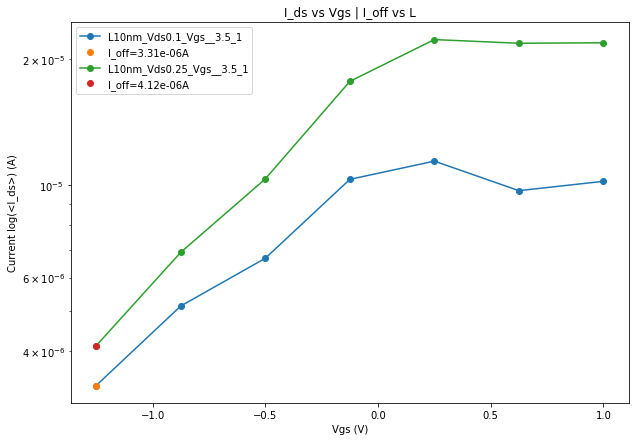

In [13]:
fig, ax = plt.subplots(1,1,figsize=(10,7))
on=6
till=9
for sim in simulations[:-1]:
    ax.plot(Vs[on:], np.abs(all_means[sim][on:]), 'o-', label=sim)
    ax.plot([Vs[on]], [all_means[sim][on]], 'o', label=f"I_off={all_means[sim][on]:.3}A")
ax.set_yscale('log')
ax.set_xlabel(f"{var} (V)")
ax.set_ylabel("Current log(<I_ds>) (A)")
ax.set_title(f"I_ds vs {var} | I_off vs L")
plt.legend()
plt.savefig("71.png", dpi=100)
plt.show()
    

# Trajectories

In [11]:
all_w_parties={}
minx=np.inf
miny=np.inf
maxx=-np.inf
maxy=-np.inf

for sim in simulations:
    stuff_inside = os.listdir(sim)
    curr_volt_files=[]
    for el in stuff_inside:
        if 'CURRENT1OVERL' in el:
            curr_volt_files.append(el)
    N = len(curr_volt_files)
    
    w_party_files={i:[] for i in range(N)}
    for el in stuff_inside:
        if 'WPARTI' in el:
            w_party_files[int(el[7:9])].append(el)
    
    all_w_parties[sim]={i:[] for i in range(N)}
    for i in range(N):
        for file in w_party_files[i]:
            w_party = np.loadtxt(f"./{sim}/{file}")
            minx=min(minx,np.min(w_party[:,1]))
            miny=min(miny,np.min(w_party[:,2]))
            maxx=max(maxx,np.max(w_party[:,1]))
            maxy=max(maxy,np.max(w_party[:,2]))
            
            all_w_parties[sim][i].append( w_party )

Vs = np.linspace(Vi, Vf, len(all_I_Vds_curves[sim]))

### Trajectories x vs t

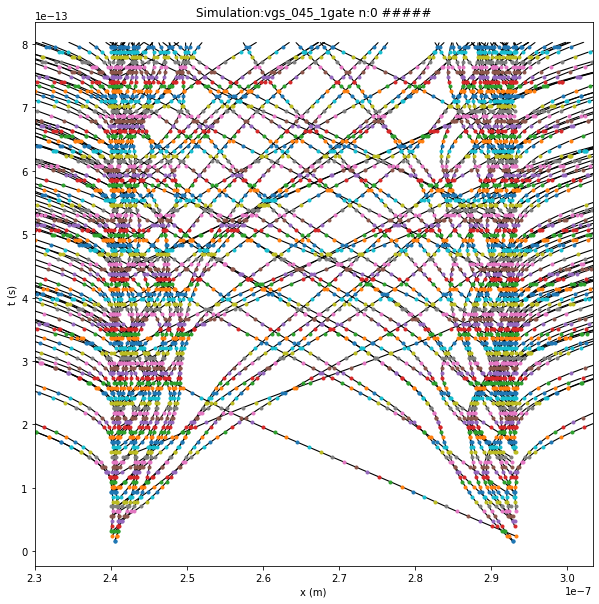

In [13]:
fig, axs = plt.subplots(1,1, figsize=(10,10))
sim=simulations[0]
n=0
dt = (all_w_parties[sim][0][-1][0,0]-all_w_parties[sim][0][0][0,0])/len(all_w_parties[sim][0])
for t in range(len(all_w_parties[sim][0])):
    axs.plot(all_w_parties[sim][n][t][:,1], all_w_parties[sim][n][t][:,0], 'o',markersize=3)
    axs.quiver(all_w_parties[sim][n][t][:,1], all_w_parties[sim][n][t][:,0],
              all_w_parties[sim][n][t][:,4], np.ones(len(all_w_parties[sim][n][t][:,4])),
               angles='xy', scale_units='xy', scale=1/dt,headwidth=1, headlength=1,width=0.002)
axs.set_xlim((minx,maxx))
#axs.set_ylim((miny,maxy))
axs.set_xlabel("x (m)")
axs.set_ylabel("t (s)")
axs.set_title(f"Simulation:{sim} n:{n} #####")
plt.savefig("3m.png")
plt.show()

### Animation with stella

In [ ]:
from IPython.display import clear_output
from time import sleep

n=1
for sim in simulations:
    for t in range(len(all_w_parties[sim][0])):
        clear_output(wait=True)
        fig, axs = plt.subplots(1,1, figsize=(12,12))
        for tpr in range(t):
            axs.plot(all_w_parties[sim][n][tpr][:,1], all_w_parties[sim][n][tpr][:,2], 'ko', markersize=1)

        axs.plot(all_w_parties[sim][n][t][:,1], all_w_parties[sim][n][t][:,2], 'o')
        axs.quiver(all_w_parties[sim][n][t][:,1], all_w_parties[sim][n][t][:,2],
                  all_w_parties[sim][n][t][:,4], all_w_parties[sim][n][t][:,5],scale_units ='inches',
              width=.002, color='r')
        axs.set_xlim((minx,maxx))
        axs.set_ylim((miny,maxy))
        axs.set_xlabel("x (m)")
        axs.set_ylabel("y (m)")
        axs.set_title(f"Simulation:{sim} n:{n}  t:{ all_w_parties[sim][n][t][0,0]}s #####")
        plt.show()
        sleep(0.001)

### Simultaneous Animation

In [ ]:
from IPython.display import clear_output
from time import sleep

ns=[0,3,5,8]
for sim in simulations:
    for t in range(len(all_w_parties[sim][0])):
        clear_output(wait=True)
        fig, axs = plt.subplots(2,2, figsize=(12,12))
        axs = axs.flatten()
        for k,n in enumerate(ns):
            axs[k].plot(all_w_parties[sim][n][t][:,1], all_w_parties[sim][n][t][:,2], 'o')
            axs[k].quiver(all_w_parties[sim][n][t][:,1], all_w_parties[sim][n][t][:,2],
                      all_w_parties[sim][n][t][:,4], all_w_parties[sim][n][t][:,5],scale_units ='inches',
                  width=.002, color='r')
            axs[k].set_xlim((minx,maxx))
            axs[k].set_ylim((miny,maxy))
            axs[k].set_xlabel("x (m)")
            axs[k].set_ylabel("y (m)")
            axs[k].set_title(f"Simulation:{sim} n:{n}  t:{ all_w_parties[sim][n][t][0,0]}s #####")
        plt.show()
        sleep(0.001)

# Transmission

In [55]:
simulations=["Wparti2barreras", "WpartiOpcional"]
Vi=0
Vf=0.4
var="Vds"
E_Ts={}
to_remove=[]
for sim in simulations:
    stuff_inside = os.listdir(sim)
    print(sim)
    curr_volt_files=[]
    for el in stuff_inside:
        if 'AVERAGE_TRANS' in el:
            curr_volt_files.append(el)
    try:
        aux = np.loadtxt(f"{sim}/{curr_volt_files[0]}")
    except:
        print(f"{sim} folder empty!")
        to_remove.append(sim)
        continue
    E_Ts[sim]=[]
    for k in range(len(curr_volt_files)):
        aux = np.loadtxt(f"{sim}/{curr_volt_files[k]}").T
        E_Ts[sim].append(aux)

for sim in to_remove:
    simulations.remove(sim)

Wparti2barreras
WpartiOpcional


Simulation: Wparti2barreras ######################################


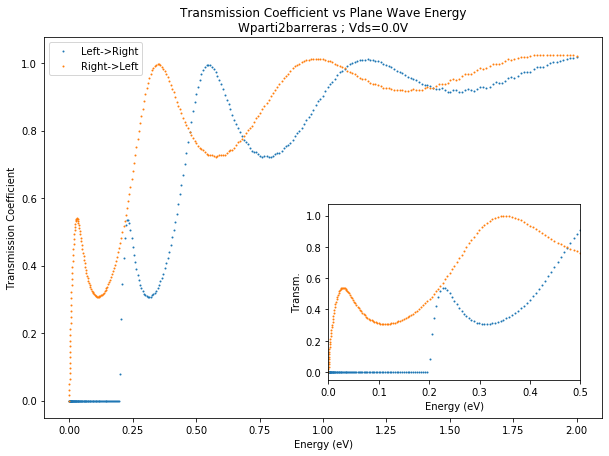

Simulation: WpartiOpcional ######################################


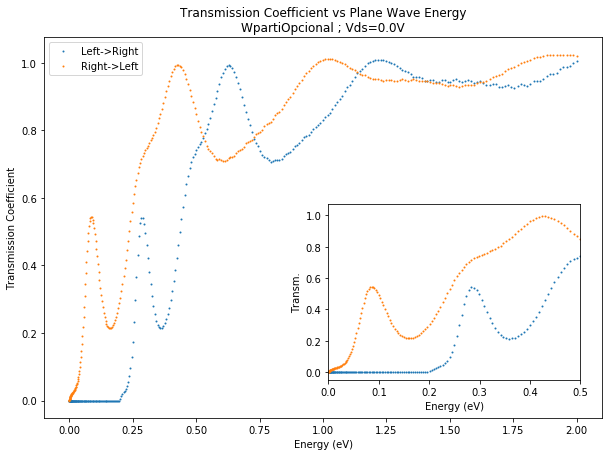

In [57]:
Vds=[0.2,0.2]
for sim in simulations:
    os.makedirs(f"./{sim}/EvsT/", exist_ok=True)
    print(f"Simulation: {sim} ######################################")
    Vs = np.linspace(Vi, Vf, len(E_Ts[sim]))
    for k in range(len(E_Ts[sim])):
        fig, ax = plt.subplots(1,1,figsize=(10,7))
        half = int(np.where(np.logical_not(E_Ts[sim][k][0]))[0])
        ax.plot(E_Ts[sim][k][0][:half], E_Ts[sim][k][1][:half], 'o', markersize=1, label="Left->Right")
        ax.plot(E_Ts[sim][k][0][half:], E_Ts[sim][k][1][half:], 'o', markersize=1, label="Right->Left")
        ax.set_title(f"Transmission Coefficient vs Plane Wave Energy\n{sim} ; Vds={Vs[k]}V")
        ax.set_xlabel("Energy (eV)")
        ax.set_ylabel("Transmission Coefficient")
        ax.legend()
        left, bottom, width, height = [0.52, 0.2, 0.35, 0.35]
        ax2 = fig.add_axes([left, bottom, width, height])
        ax2.plot(E_Ts[sim][k][0][:half], E_Ts[sim][k][1][:half], 'o', markersize=1, label="Left->Right")
        ax2.plot(E_Ts[sim][k][0][half:], E_Ts[sim][k][1][half:], 'o', markersize=1, label="Right->Left")        
        ax2.set_xlim((0,0.5))
        ax2.set_xlabel("Energy (eV)")
        ax2.set_ylabel("Transm.")
        plt.savefig(f"./{sim}/EvsT/{k}.png", dpi=50)
        plt.show()


0
1


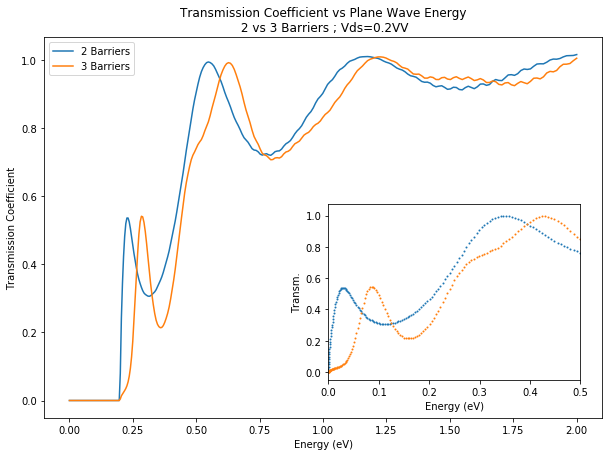

In [73]:
fig, ax = plt.subplots(1,1,figsize=(10,7))
left, bottom, width, height = [0.52, 0.2, 0.35, 0.35]
ax2 = fig.add_axes([left, bottom, width, height])
names=["2 Barriers", "3 Barriers"]
for k,sim in enumerate(simulations):
    print(k)
    half = int(np.where(np.logical_not(E_Ts[sim][0][0]))[0])
    ax.plot(E_Ts[sim][0][0][:half], E_Ts[sim][0][1][:half], '-', markersize=1, label=names[k])
    #ax.plot(E_Ts[sim][0][0][half:], E_Ts[sim][0][1][half:], 'o', markersize=1, label="Right->Left")
    ax.set_title(f"Transmission Coefficient vs Plane Wave Energy\n 2 vs 3 Barriers ; Vds=0.2VV")
    ax.set_xlabel("Energy (eV)")
    ax.set_ylabel("Transmission Coefficient")
    ax.legend()    
    #ax2.plot(E_Ts[sim][0][0][:half], E_Ts[sim][0][1][:half], 'o', markersize=1, label=names[k])
    ax2.plot(E_Ts[sim][0][0][half:], E_Ts[sim][0][1][half:], 'o', markersize=1, label="Right->Left")        
    ax2.set_xlim((0,0.5))
    ax2.set_xlabel("Energy (eV)")
    ax2.set_ylabel("Transm.")
plt.savefig(f"6c.png", dpi=100)
plt.show()